Columns available in the dataset:
YEAR
LocationAbbr
LocationDesc
TopicType
TopicDesc
MeasureDesc
DataSource
Response
Data_Value_Unit
Data_Value_Type
Data_Value
Data_Value_Std_Err
Low_Confidence_Limit
High_Confidence_Limit
Sample_Size
Gender
Race
Age
Education
GeoLocation
TopicTypeId
TopicId
MeasureId
StratificationID1
StratificationID2
StratificationID3
StratificationID4
SubMeasureID
DisplayOrder
Latitude
Longitude
Enter column(s) to compare (comma-separated): Age,Race,Education 

Correlation Matrix:
           Age  Race  Education
Age        NaN   NaN        NaN
Race       NaN   NaN        NaN
Education  NaN   NaN        NaN


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


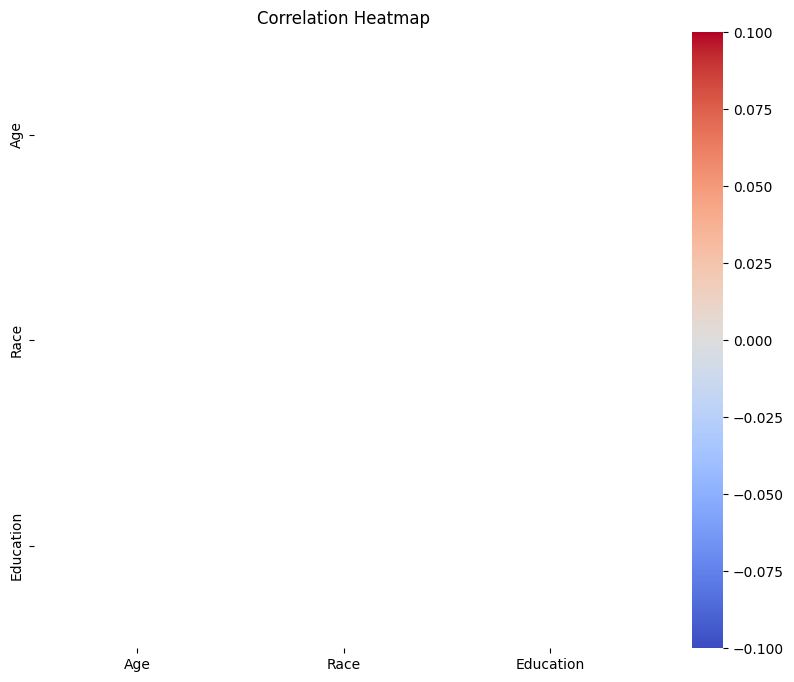

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the data
def visualize_data(data, columns_to_compare):
   plt.figure(figsize=(12, 8))
   for column in columns_to_compare:
        plt.hist(data[column], bins=20, alpha=0.5, label=column)
   plt.xlabel('Values')
   plt.ylabel('Frequency')
   plt.title('Comparison of Selected Columns')
   plt.legend()
   plt.show()

# Main function
def main():
    # Load the dataset
    data = pd.read_csv("Cleaned_Youth_Tobacco_Survey_Data.csv")

    # Display columns for user to choose
    print("Columns available in the dataset:")
    for col in data.columns:
        print(col)

    # User input for columns to visualize
    columns_to_compare = [col.strip() for col in input("Enter column(s) to compare (comma-separated): ").split(",")]

    # Ensure selected columns exist
    for col in columns_to_compare:
        if col not in data.columns:
            print(f"Column '{col}' does not exist in the dataset.")
            return

    numeric_data = data[columns_to_compare].apply(pd.to_numeric, errors='coerce').dropna()

    # Calculate correlation matrix
    correlation_matrix = numeric_data.corr()

    # Display correlation matrix
    print("\nCorrelation Matrix:")
    print(correlation_matrix)

    # Plot correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()



if __name__ == "__main__":
    main()